ECG Anomaly Detection

This project explores the ECG dataset from Kaggle repository in Google Colab environment. The ECG dataset is divided into training and test dataset. Using supervised machine learning models, predicted the target variable for the test dataset. The data in last column 0 indicates normal ECG while 1 indicates abnormal ECG data.

In [ ]:
#Mount the Google Drive
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


In [ ]:
! pip install kaggle

In [ ]:
#Create Directory
! mkdir ~/.kaggle

In [ ]:
#Copy the Kaggle JSON File
!cp "/drive/MyDrive/Colab Notebooks/kaggle.json" ~/.kaggle/

In [ ]:
#Modify the permissions of JSON file
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#Download the ECG dataset using API Command
!kaggle datasets download -d devavratatripathy/ecg-dataset

  0% 0.00/3.28M [00:00<?, ?B/s]
100% 3.28M/3.28M [00:00<00:00, 53.8MB/s]


In [ ]:
#Export the data from zip file
import zipfile
with zipfile.ZipFile('/content/ecg-dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('/content')

In [ ]:
#Import statement
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn import svm
from sklearn import tree
from sklearn.neural_network import MLPClassifier

# Exploratory Data Analysis

In [ ]:
#Read the CSV file
df_ECG_dataset = pd.read_csv('/content/ecg.csv', delimiter = ",", header = None)
df_ECG_dataset.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818287,-1.250522,-0.477492,-0.363808,-0.491957,-0.421855,-0.309201,-0.495939,-0.342119,-0.355336,-0.367913,-0.316503,-0.412374,-0.471672,-0.413458,-0.364617,-0.449298,-0.471419,-0.424777,-0.462517,-0.552472,-0.475375,-0.694200,-0.701868,-0.593812,-0.660684,-0.713831,-0.769807,-0.672282,-0.653676,-0.639406,-0.559302,-0.591670,...,1.258179,1.433789,1.700533,1.999043,2.125341,1.993291,1.932246,1.797437,1.522284,1.251168,0.998730,0.483722,0.023132,-0.194914,-0.220917,-0.243737,-0.254695,-0.291136,-0.256490,-0.227874,-0.322423,-0.289286,-0.318170,-0.363654,-0.393456,-0.266419,-0.256823,-0.288694,-0.162338,0.160348,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1.0
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,0.148951,0.183527,0.294876,0.190233,0.235575,0.253487,0.221742,0.050233,0.178042,0.139563,0.046794,0.043007,0.106544,0.012654,0.003995,0.045724,-0.045999,-0.072667,-0.071078,-0.153866,-0.227254,-0.249270,-0.253489,-0.332835,-0.264330,-0.345825,-0.310781,-0.334160,-0.306178,-0.174563,...,1.808428,2.164346,2.070747,1.903614,1.764455,1.507769,1.293428,0.894562,0.578016,0.244343,-0.286443,-0.515881,-0.732707,-0.832465,-0.803318,-0.836252,-0.777865,-0.774753,-0.733404,-0.721386,-0.832095,-0.711982,-0.751867,-0.757720,-0.853120,-0.766988,-0.688161,-0.519923,0.039406,0.560327,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1.0
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490658,-1.183580,-0.394229,-0.282897,-0.356926,-0.287297,-0.399489,-0.473244,-0.379048,-0.399039,-0.178594,-0.339522,-0.498447,-0.337251,-0.425480,-0.423952,-0.463170,-0.493253,-0.549749,-0.529831,-0.530935,-0.502365,-0.417368,-0.526346,-0.471005,-0.676784,-0.898612,-0.610571,-0.530164,-0.765674,-0.581937,-0.537848,-0.556386,...,1.810988,2.185398,2.262985,2.052920,1.890488,1.793033,1.564784,1.234619,0.900302,0.551957,0.258222,-0.128587,-0.092585,-0.168606,-0.495989,-0.395034,-0.328238,-0.448138,-0.268230,-0.456415,-0.357867,-0.317508,-0.434112,-0.549203,-0.324615,-0.268082,-0.220384,-0.117429,0.614059,1.284825,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1.0
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,-0.183319,-0.101657,-0.273874,-0.127818,-0.195983,-0.213523,-0.176473,-0.156932,-0.149172,-0.181510,-0.180074,-0.246151,-0.274260,-0.140960,-0.277449,-0.382549,-0.311937,-0.360093,-0.405968,-0.571433,-0.524106,-0.537886,-0.606778,-0.661446,-0.683375,-0.746683,-0.635662,-0.625231,-0.540094,-0.674995,...,1.772155,2.000769,1.925003,1.898426,1.720953,1.501711,1.422492,1.023225,0.776341,0.504426,0.056382,-0.233161,-0.406388,-0.327528,-0.460868,-0.402536,-0.345752,-0.354206,-0.439959,-0.425326,-0.439789,-0.451835,-0.395926,-0.448762,-0.391789,-0.376307,-0.461069,-0.253524,0.213006,0.491173,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1.0
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,-0.298107,-0.428928,-0.491351,-0.361304,-0.339296,-0.324952,-0.290113,-0.363051,-0.525684,-0.597423,-0.575523,-0.567503,-0.504555,-0.618406,-0.682814,-0.743849,-0.815588,-0.826902,-0.782374,-0.929462,-0.999672,-1.060969,-1.007877,-1.028735,-1.122629,-1.028650,-1.046515,-1.063372,-1.122423,-0.983242,...,1.155363,1.336254,1.627534,1.717594,1.696487,1.741686,1.674078,1.546928,1.331738,1.110168,0.922210,0.521777,0.154852,-0.123861,-0.202998,-0.247956,-0.219122,-0.214695,-0.319215,-0.198597,-0.151618,-0.129593,-0.074939,-0.

In [ ]:
#Display information about the dataset
print("Information of the ECG dataset: \n")
print(df_ECG_dataset.info())

Information of the ECG dataset: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4998 entries, 0 to 4997
Columns: 141 entries, 0 to 140
dtypes: float64(141)
memory usage: 5.4 MB
None


Text(0, 0.5, 'Count')

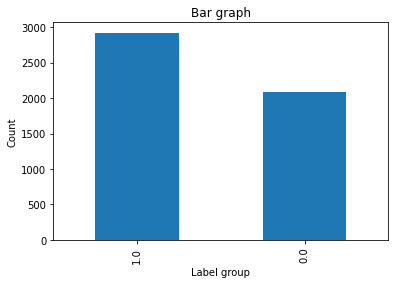

In [ ]:
#Graph for label column
fig = plt.figure()
ax = df_ECG_dataset[140].value_counts().plot(kind='bar')
ax.set_title("Bar graph")
ax.set_xlabel("Label group")
ax.set_ylabel("Count")

In [ ]:
data = df_ECG_dataset.iloc[:,:-1].values
target = df_ECG_dataset.iloc[:,-1].values

# Model Development

In [ ]:
#Forming the training and testing dataset
#80% of training set, 20% testing set
data_train, data_test, target_train, target_test = train_test_split(data, target, test_size = 0.2, random_state = 72)

In [ ]:
#Display the structure of dataset
print("Training dataset: ", data_train.shape)
print("Training dataset target: ", target_train.shape)
print("Testing dataset: ", data_test.shape)
print("Testing dataset target: ", target_test.shape)

Training dataset:  (3998, 140)
Training dataset target:  (3998,)
Testing dataset:  (1000, 140)
Testing dataset target:  (1000,)


In [ ]:
#Calculate the performance metrics
sns.set(rc={'figure.figsize':(9.7,6.27)})
def cal_performance_metric(test_label, prediction_label):

  # Model Accuracy
  print('Accuracy: %0.3f' % accuracy_score(test_label, prediction_label))
  
  # Precision
  print('Precision: %0.3f' % precision_score(test_label, prediction_label))  
  
  # Recall
  print('Recall: %0.3f' % recall_score(test_label, prediction_label))

  # F1 score
  print('F1 score: %0.3f' % f1_score(test_label, prediction_label))

  # Confusion matrix
  results = confusion_matrix(test_label, prediction_label)
  print("Confusion matrix: \n", sns.heatmap(results, annot=True, fmt='g'))

In [ ]:
#Create the SVM Model using Grid Search CV
model_SVM = svm.SVC()
parameters = {'kernel': ["linear", "rbf", "poly"], 'C': [1, 5, 10]}
grid = GridSearchCV(model_SVM, param_grid = parameters)
grid.fit(data_train, target_train)
print("Optimal model structure:\n", grid.best_estimator_)

#Predict values for test dataset
prediction = grid.predict(data_test)

Optimal model structure:
 SVC(C=5, kernel='poly')


Accuracy: 0.995
Precision: 0.997
Recall: 0.995
F1 score: 0.996
Confusion matrix: 
 AxesSubplot(0.125,0.125;0.62x0.755)


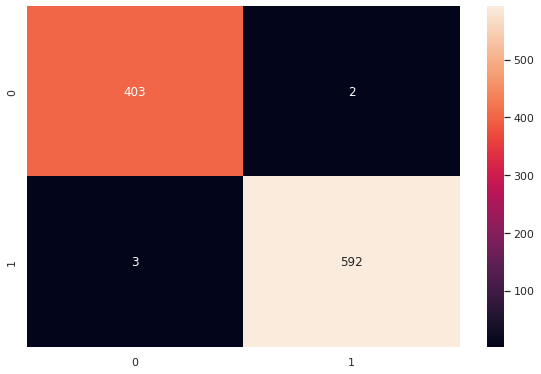

In [ ]:
#Calculate performance of the SVM Model
cal_performance_metric(target_test, prediction)

In [ ]:
#Create the Decision Tree using Grid Search CV
model_DT = tree.DecisionTreeClassifier()
parameters = {'max_depth': [2, 8, 12, 16, None]}
grid = GridSearchCV(model_DT, param_grid = parameters)
grid.fit(data_train, target_train)
print("Optimal model structure:\n", grid.best_estimator_)

#Predict values for test dataset
prediction = grid.predict(data_test)

Optimal model structure:
 DecisionTreeClassifier(max_depth=8)


Accuracy: 0.983
Precision: 0.987
Recall: 0.985
F1 score: 0.986
Confusion matrix: 
 AxesSubplot(0.125,0.125;0.62x0.755)


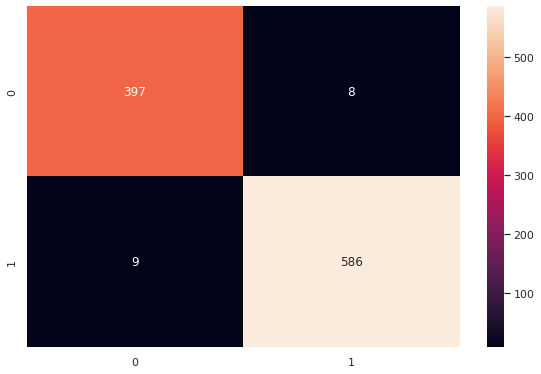

In [ ]:
#Calculate performance of the Decision Tree
cal_performance_metric(target_test, prediction)

In [ ]:
#Create the MLP Model using Grid Search CV
model_MLP = MLPClassifier()
parameters = {'solver': ["lbfgs", "sgd", "adam"], 'max_iter': [200, 400, 600],
              'learning_rate_init': [0.001, 0.002, 0.003, 0.004]}
grid = GridSearchCV(model_MLP, param_grid = parameters)
grid.fit(data_train, target_train)
print("Optimal model structure:\n", grid.best_estimator_)

#Predict values for test dataset
prediction = grid.predict(data_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Optimal model structure:
 MLPClassifier(learning_rate_init=0.002, solver='sgd')


Accuracy: 0.993
Precision: 0.993
Recall: 0.995
F1 score: 0.994
Confusion matrix: 
 AxesSubplot(0.125,0.125;0.62x0.755)


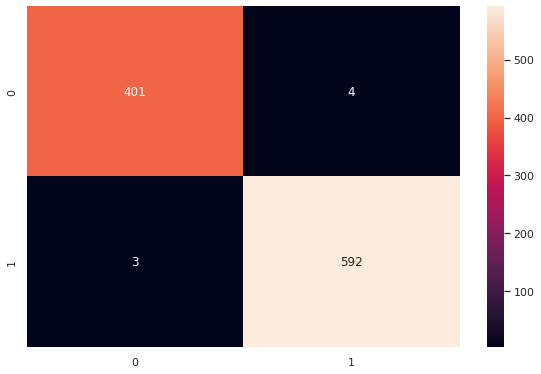

In [16]:
#Calculate performance of the MLP Model
cal_performance_metric(target_test, prediction)

# Performance Summary

Following is the performance metric of all the implemented models:

Model | Accuracy | Precision | Recall | F1 Score
---|---|:---|:---:|---:|
SVM | 99.50 | 99.70 | 99.50 | 99.60
Decision Tree| 98.30 | 98.70 | 98.50 | 98.60
MLP Model | 99.30 | 99.30 | 99.50 | 99.40

Model | True Positive | False Positive | False Negative | True Negative
---:|---:|---:|:---|:---:|
SVM | 403 | 2 | 3 | 592
Decision Tree | 397 | 8 | 9 | 586
MLP Model | 401 | 4 | 3 | 592